In [7]:
import torch
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import numpy as np
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
data_path = "C:\\Users\\Zayan\\Documents\\code\\personal_repos\\neural_nets\\ECE_8770\\project_2\\data\\online+retail\\Online Retail.xlsx"
data = pd.read_excel(data_path, engine='openpyxl')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print(data.Description.nunique())
print(data.Country.nunique())
print(data.StockCode.nunique())

4223
38
4070


<Axes: >

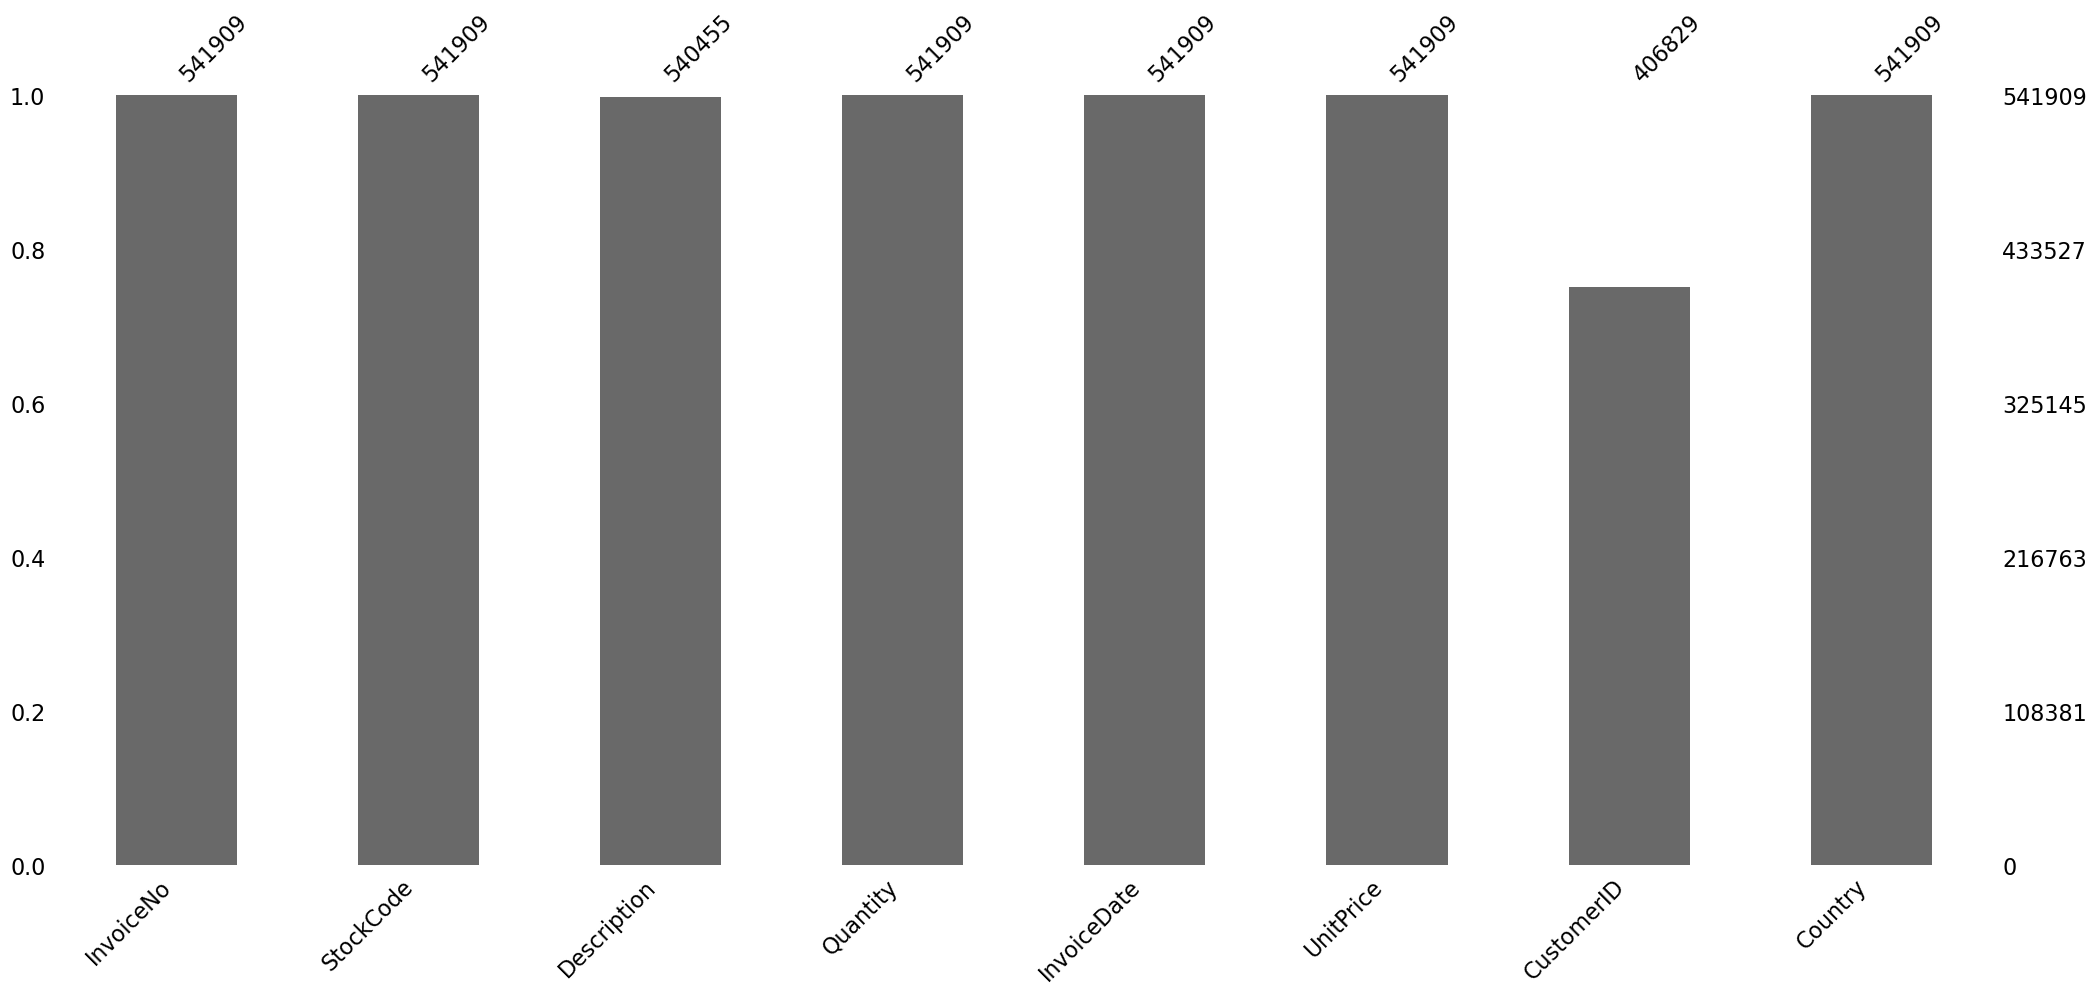

In [5]:
msno.bar(data)

In [10]:
quantity_per_time_data = data.groupby('InvoiceDate')['Quantity'].sum()
quantity_per_time_data = pd.DataFrame(quantity_per_time_data)

In [11]:
type(quantity_per_time_data)

pandas.core.frame.DataFrame

In [12]:
scaler = MinMaxScaler()

quantity_per_time_data_SCALED = pd.DataFrame(scaler.fit_transform(quantity_per_time_data), columns=['Quantity'])

In [13]:
quantity_per_time_data_SCALED

,Quantity
0,0.500247
1,0.500074
2,0.500605
3,0.500019
4,0.502772
...,...
23255,0.500469
23256,0.500741
23257,0.501716
23258,0.500407


<Axes: >

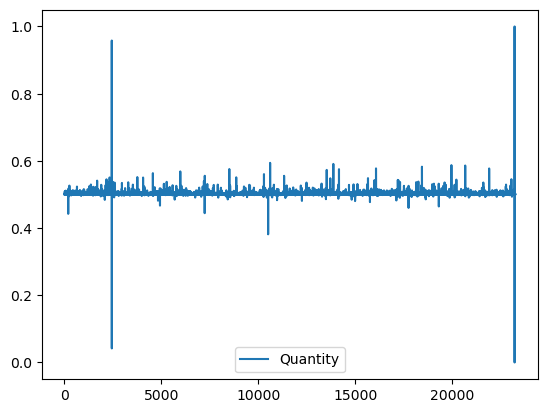

In [17]:
quantity_per_time_data_SCALED.plot()

<Axes: >

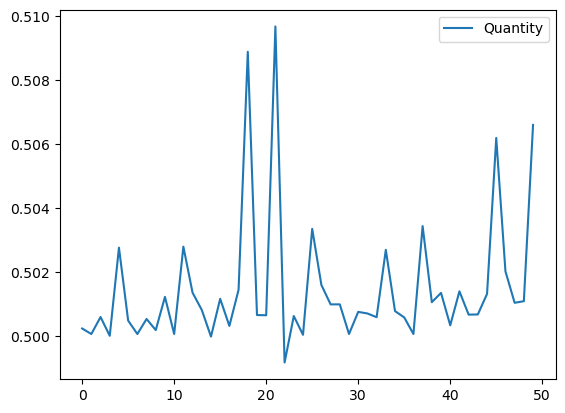

In [21]:
quantity_per_time_data_SCALED[:50].plot()

Remove outliers

In [22]:
quantity_per_time_data_SCALED.describe()

,Quantity
count,23260.000000
mean,0.501374
std,0.007251
min,0.000000
25%,0.500080
50%,0.500716
75%,0.501648
max,1.000000


In [23]:
def remove_outliers_iqr(df):
    """
    Removes outliers from a DataFrame based on the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame from which to remove outliers.
    
    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
    """
    # Calculate Q1, Q3, and IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define a mask for rows without outliers
    condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Return the DataFrame without outliers
    return df[condition]

<Axes: >

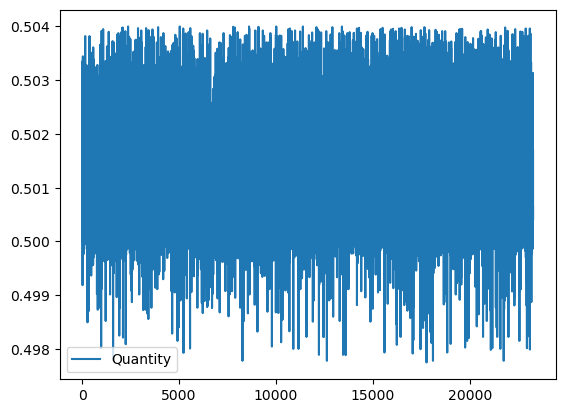

In [24]:
df_cleaned = remove_outliers_iqr(df=quantity_per_time_data_SCALED)
df_cleaned.plot()

In [16]:

# save_path = "c:/Users/Zayan/Documents/code/personal_repos/neural_nets/ECE_8770/project_2/data/online+retail/quantity_per_time_data.csv"
# quantity_per_time_data_SCALED.to_csv(save_path, index=False)a